<a href="https://colab.research.google.com/github/Krzesimir13/DataQuest/blob/main/k-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means alghoritm

##1. Preparing the environment and uploading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
np.set_printoptions(precision=3, suppress=False)
pd.options.display.precision = 3

In [3]:
raw_data = pd.read_csv('mall_customers.csv')
customers = raw_data.copy()

In [4]:
customers.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customers.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000,200.000,200.000,200.000
mean,100.500,38.850,60.560,50.200
std,57.879,13.969,26.265,25.824
min,1.000,18.000,15.000,1.000
25%,50.750,28.750,41.500,34.750
50%,100.500,36.000,61.500,50.000
75%,150.250,49.000,78.000,73.000
max,200.000,70.000,137.000,99.000


In [7]:
customers['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


##2. Hand-made alghoritm

In [ ]:
customers = customers[['Age', 'Spending Score']]

In [ ]:
centroids = customers.sample(n=2)
centroids

,Age,Spending Score
74,59,47
73,60,56


In [ ]:
def fetch_coordinates(centroids):
  age_centroid_1 = centroids.iloc[0, 0]
  score_centroid_1 = centroids.iloc[0, 1]
  age_centroid_2 = centroids.iloc[1, 0]
  score_centroid_2 = centroids.iloc[1, 1]
  return age_centroid_1, score_centroid_1, age_centroid_2, score_centroid_2

In [ ]:
age_centroid_1, score_centroid_1, \
age_centroid_2, score_centroid_2 = fetch_coordinates(centroids)

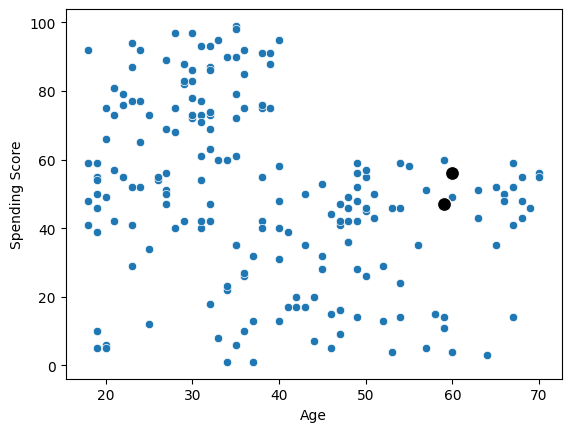

In [ ]:
sns.scatterplot(data=customers, x="Age", y="Spending Score")
sns.scatterplot(data=centroids, x="Age", y="Spending Score",
                s=100, color='black')
plt.show()

In [ ]:
def calculate_distance(row, age, score):
  return np.sqrt((row['Age'] - age)**2 + (row['Spending Score'] - score)**2)

In [ ]:
customers['dist_centroid_1'] = customers.apply(
    lambda x: calculate_distance(x, age_centroid_1, score_centroid_1), axis=1
    )
customers['dist_centroid_2'] = customers.apply(
    lambda x: calculate_distance(x, age_centroid_2, score_centroid_2), axis=1
    )

In [ ]:
customers.head()

,Age,Spending Score,dist_centroid_1,dist_centroid_2
0,19,39,40.792,44.385
1,21,81,50.990,46.325
2,20,6,56.586,64.031
3,23,77,46.861,42.544
4,31,40,28.862,33.121


In [ ]:
def calculate_distance_assign_clusters(customers, centroids):
  age_c1, score_c1, age_c2, score_c2 = fetch_coordinates(centroids)
  customers['dist_centroid_1'] = customers.apply(
    lambda x: calculate_distance(x, age_c1, score_c1), axis=1
    )
  customers['dist_centroid_2'] = customers.apply(
    lambda x: calculate_distance(x, age_c2, score_c2), axis=1
    )
  customers['cluster'] = customers.apply(
    lambda x: 1 if x['dist_centroid_1'] < x['dist_centroid_2'] else 2, axis=1
    )

In [ ]:
calculate_distance_assign_clusters(customers, centroids)

In [ ]:
customers['cluster'].value_counts()

,count
cluster,
1,116
2,84


In [ ]:
customers.head()

,Age,Spending Score,dist_centroid_1,dist_centroid_2,cluster
0,19,39,40.792,44.385,1
1,21,81,50.990,46.325,2
2,20,6,56.586,64.031,1
3,23,77,46.861,42.544,2
4,31,40,28.862,33.121,1


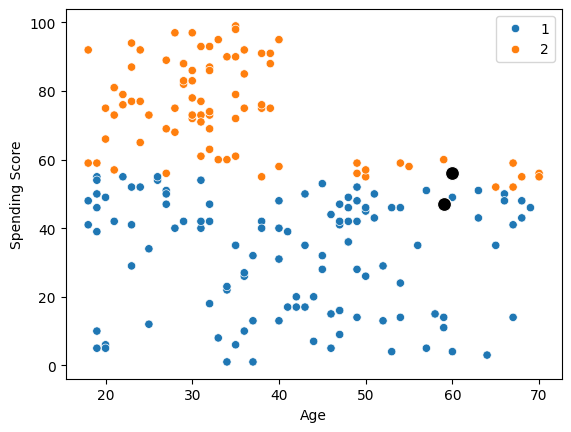

In [ ]:
sns.scatterplot(data=customers, x="Age", y="Spending Score",
                hue='cluster', palette='tab10')
sns.scatterplot(data=centroids, x="Age", y="Spending Score",
                s=100, color='black')
plt.show()

In [ ]:
new_centroids = customers.groupby(['cluster']).mean()\
 [['Age', 'Spending Score']].reset_index().drop('cluster', axis=1)
new_centroids

,Age,Spending Score
0,41.767,32.56
1,34.821,74.56


In [ ]:
calculate_distance_assign_clusters(customers, new_centroids)

In [ ]:
customers

,Age,Spending Score,dist_centroid_1,dist_centroid_2,cluster
0,19,39,23.660,38.920,1
1,21,81,52.704,15.248,2
2,20,6,34.340,70.143,1
3,23,77,48.240,12.071,2
4,31,40,13.087,34.770,1
...,...,...,...,...,...
195,35,79,46.930,4.444,2
196,45,28,5.590,47.659,1
197,32,74,42.575,2.876,2
198,32,18,17.533,56.630,1


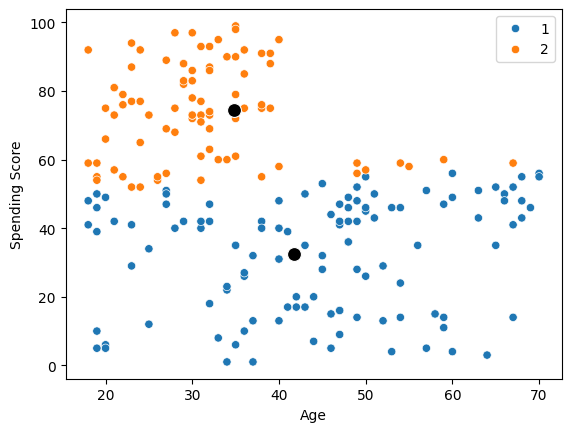

In [ ]:
sns.scatterplot(data=customers, x="Age", y="Spending Score",
                hue='cluster', palette='tab10')
sns.scatterplot(data=new_centroids, x="Age", y="Spending Score",
                s=100, color='black')
plt.show()

In [ ]:
def create_clusters(customers, steps):
  centroids = customers.sample(n=2)
  calculate_distance_assign_clusters(customers, centroids)
  for i in range(steps):
    new_centroids = customers.groupby(['cluster']).mean()\
      [['Age', 'Spending Score']].reset_index().drop('cluster', axis=1)
    calculate_distance_assign_clusters(customers, new_centroids)
  return customers['cluster']

In [ ]:
create_clusters(customers, 6)

,cluster
0,2
1,1
2,2
3,1
4,2
...,...
195,1
196,2
197,1
198,2


##3. Iterative K-Means alghoritm

In [ ]:
customers = raw_data.copy()
cols_to_keep = ['Annual Income', 'Spending Score']

In [ ]:
customers = customers.loc[:, cols_to_keep]

In [ ]:
customers.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
def get_centroids(df, k):
  centroids = df.sample(n=k).reset_index(drop=True)
  return centroids, centroids.values.tolist()

In [ ]:
centroids, coords = get_centroids(customers, 5)
print(centroids)
print(coords)

   Annual Income  Spending Score  dist_centroid_1  dist_centroid_2 cluster
0             39              28           23.716           43.907       1
1             78              22           15.745           48.657       1
2            137              83           94.697           79.332       2
3             63              48           23.424           19.281       2
4             19              99           86.183           51.517       2
[[39, 28, 23.715953951928647, 43.90741317089861, '1'], [78, 22, 15.74480459866047, 48.65671722753191, '1'], [137, 83, 94.69734458711078, 79.33158848378118, '2'], [63, 48, 23.423733089539763, 19.281206688379235, '2'], [19, 99, 86.18292099859461, 51.516849004573245, '2']]


In [ ]:
def calculate_distance(df, centroids_coords):
    names = []
    for i, centroid in enumerate(centroids_coords):
      dist = np.sqrt((df.iloc[:, 0] - centroid[0])**2 + (df.iloc[:, 1] - centroid[1])**2)
      name = 'dist_centroid_' + str(i+1)
      df[name] = dist
      names.append(name)
    return df, names

In [ ]:
customers, dist_names = calculate_distance(customers, coords)

In [ ]:
customers['cluster'] = customers[dist_names].idxmin(axis=1).str.split('_').str[-1]

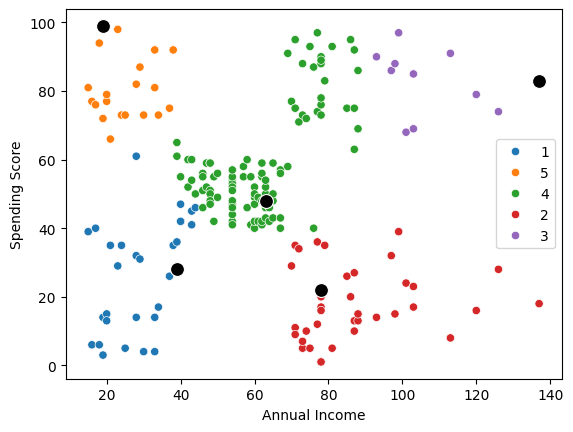

In [ ]:
sns.scatterplot(data=customers, x="Annual Income", y="Spending Score",
                hue='cluster', palette='tab10')
sns.scatterplot(data=centroids, x="Annual Income", y="Spending Score",
                s=100, color='black')
plt.show()

In [ ]:
new_centroids = customers.groupby('cluster')[cols_to_keep].mean().\
  apply(lambda x: np.round(x, 4))
new_coords = new_centroids.values.tolist()

In [ ]:
for i in range(100):
  last_coords = coords.copy()
  customers, dist_names = calculate_distance(customers, coords)
  customers['cluster'] = customers[dist_names].idxmin(axis=1).str.split('_').str[-1]
  centroids = round(customers.groupby('cluster')[cols_to_keep].mean(), 4)
  coords = centroids.values.tolist()
  if coords == last_coords:
    break
print(i)

4


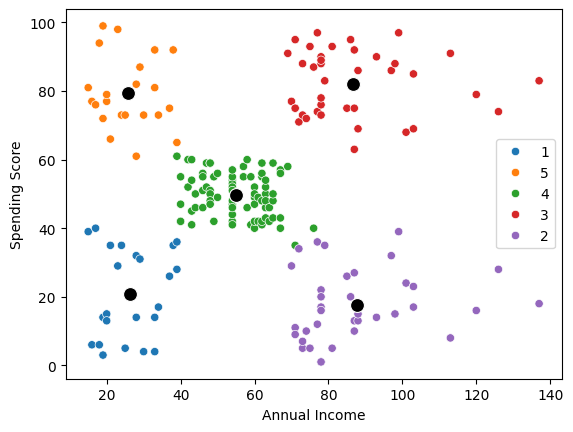

In [ ]:
sns.scatterplot(data=customers, x="Annual Income", y="Spending Score",
                hue='cluster', palette='tab10')
sns.scatterplot(data=centroids.reset_index(drop=True), x="Annual Income", y="Spending Score",
                s=100, color='black')
plt.show()

In [ ]:
customers = raw_data.copy()
cols_to_keep = ['Annual Income', 'Spending Score']

In [ ]:
customers = customers.loc[:, cols_to_keep]

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Annual Income    200 non-null    int64  
 1   Spending Score   200 non-null    int64  
 2   dist_centroid_1  200 non-null    float64
 3   dist_centroid_2  200 non-null    float64
 4   cluster          200 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [ ]:
def kmeans(df, k, n=100):
  variables = df.columns[:2]
  centroids, coords = get_centroids(df, k)

  for i in range(n):
    last_coords = coords.copy()
    df, dist_names = calculate_distance(df, coords)
    df['cluster'] = df[dist_names].idxmin(axis=1).str.split('_').str[-1]
    centroids = round(df.groupby('cluster')[variables].mean(), 4)
    coords = centroids.values.tolist()
    if coords == last_coords:
      break

  print('Numbers of iterations:', i)

  sns.scatterplot(data=df, x=variables[0], y=variables[1],
                  hue='cluster', palette='tab10')
  sns.scatterplot(data=centroids.reset_index(drop=True), x="Annual Income", y="Spending Score",
                  s=100, color='black')
  plt.show()

  return df['cluster']

Numbers of iterations: 3


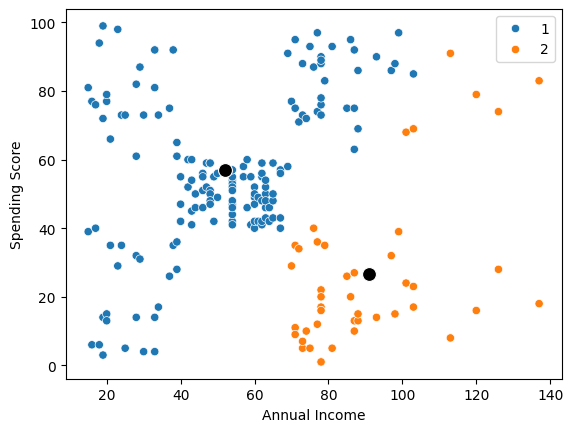

In [ ]:
clusters = kmeans(customers, 2)

##4. Optimisation of the number of neighbours

In [ ]:
customers = raw_data.copy()

In [ ]:
cols_to_keep = ['Annual Income', 'Spending Score']

customers = customers[cols_to_keep]

In [ ]:
def get_centroids(df, k):
  centroids = df.sample(n=k).reset_index(drop=True)
  return centroids, centroids.values.tolist()

In [ ]:
def calculate_distance(df, centroids_coords):
    names = []
    for i, centroid in enumerate(centroids_coords):
      dist = np.sqrt((df.iloc[:, 0] - centroid[0])**2 + (df.iloc[:, 1] - centroid[1])**2)
      name = 'dist_centroid_' + str(i+1)
      df[name] = dist
      names.append(name)
    return df, names

In [ ]:
def kmeans(df, k, n=100, draw=False, stats=False):
  variables = df.columns
  centroids, coords = get_centroids(df, k)

  for i in range(n):
    last_coords = coords.copy()
    df, dists = calculate_distance(df, coords)
    df['cluster'] = df[dists].idxmin(axis=1).str.split('_').str[-1].astype(int)
    centroids = round(df.groupby('cluster')[variables].mean(), 4)
    coords = centroids.values.tolist()
    if coords == last_coords:
      break

  df['sqrt_dist_centroid'] = df[dists].min(axis=1) **2
  inertia = df['sqrt_dist_centroid'].sum()

  if stats == True:
    print('Numebr of iterations:', i)
    print('Inertia:', inertia)

  if draw == True:
    sns.scatterplot(data=df, x=variables[0], y=variables[1],
                    hue='cluster', palette='tab10')
    sns.scatterplot(data=centroids.reset_index(drop=True), x="Annual Income", y="Spending Score",
                    s=100, color='black')
    plt.show()

  return df['cluster'], inertia

In [ ]:
clusters, inertia = kmeans(customers, 2)

[np.float64(269981.27999999997), np.float64(186362.95600664), np.float64(106348.37306241), np.float64(73679.78903966), np.float64(44454.476479920006), np.float64(38797.90276412), np.float64(36635.281202779996), np.float64(30441.53483207), np.float64(25725.50793675), np.float64(25202.71951222)]


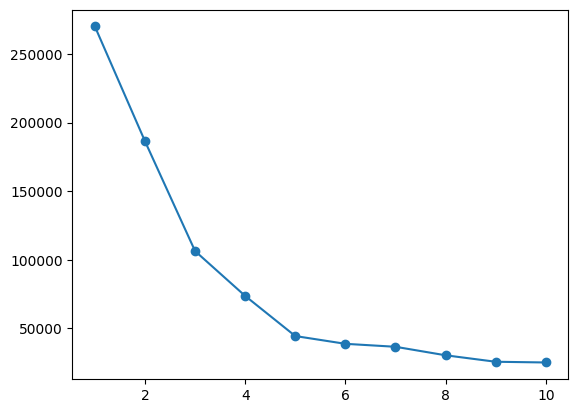

In [ ]:
inertias = []

for i in range(1, 11):
  _, inertia = kmeans(customers, i)
  inertias.append(inertia)

print(inertias)

plt.plot(range(1, 11), inertias, marker='o')

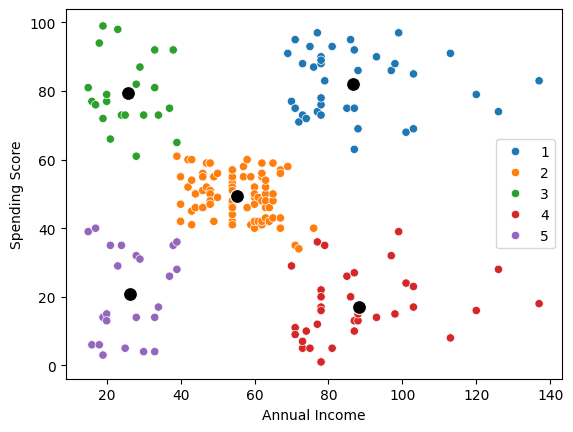

In [ ]:
clusters, inertia = kmeans(customers, k=5, draw=True)

##4. K-means from Scikit-Learn

In [21]:
customers = raw_data.copy()

In [22]:
from sklearn.cluster import KMeans

In [23]:
def plot_elbow_curve(df, max_clusters=10):
    inertias = []

    for k in range(1, max_clusters+1):
        model = KMeans(n_clusters=k, random_state=744)
        cluster = model.fit_predict(df)
        inertias.append(round(model.inertia_, 2))

    #plt.figure(figsize=(12, 8))
    plt.plot(range(1, max_clusters+1), inertias, marker='o')
    plt.xticks(ticks=range(1, max_clusters+1), labels=range(1, max_clusters+1))
    plt.title('Inertia vs Number of Clusters')
    plt.tight_layout()
    plt.show()

    return inertias

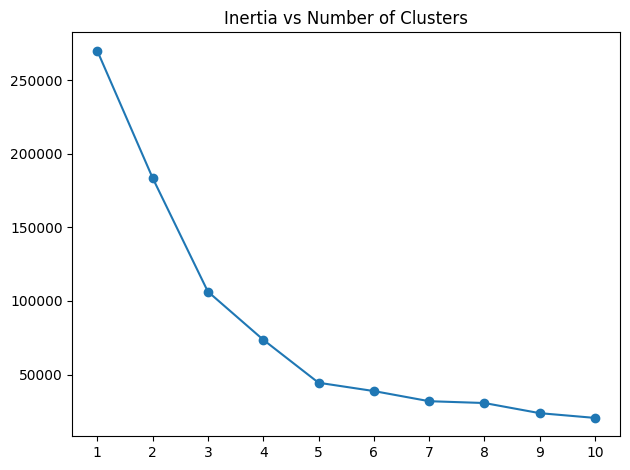

In [24]:
inertias = plot_elbow_curve(customers[cols_to_keep])

In [25]:
from sklearn.preprocessing import StandardScaler

def scaler(df):
  scaler = StandardScaler()
  scaler.fit(df)
  return scaler.transform(df)

In [26]:
customers_modif = raw_data.copy()

In [27]:
customers_modif = customers_modif.drop('CustomerID', axis=1)

In [28]:
customers_modif['Gender'] = customers_modif['Gender'].map({'Male' : 1, 'Female' : 0})

In [29]:
scaled_customers = scaler(customers_modif)

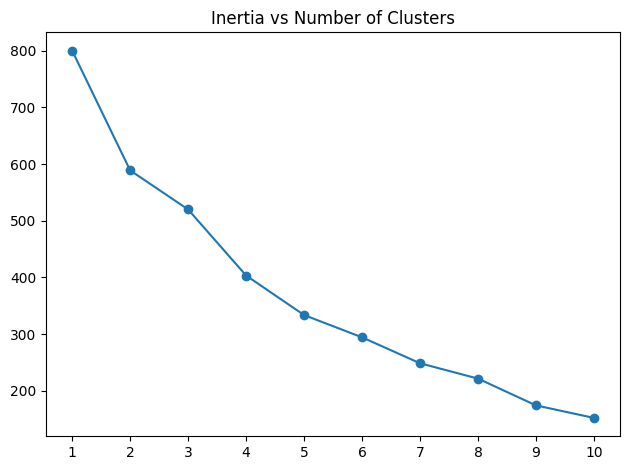

[800.0, 588.8, 519.85, 403.37, 333.62, 294.3, 248.54, 221.49, 174.24, 152.12]

In [30]:
plot_elbow_curve(scaled_customers)

In [31]:
model = KMeans(n_clusters=6)

clusters = model.fit_predict(scaled_customers)
customers['Cluster'] = model.fit_predict(scaled_customers) + 1
customers['Cluster'].value_counts()

,count
Cluster,
2,42
3,41
4,36
6,34
5,24
1,23


In [32]:
numeric_columns = ['Age', 'Annual Income', 'Spending Score']

customers.groupby('Cluster')[numeric_columns].mean()

,Age,Annual Income,Spending Score
Cluster,,,
1,25.000,25.261,77.609
2,52.976,58.119,32.000
3,52.098,55.098,37.317
4,28.722,77.444,60.750
5,33.417,87.542,76.667
6,29.353,57.118,39.824


In [33]:
customers.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,6
3,4,Female,23,16,77,1
4,5,Female,31,17,40,6


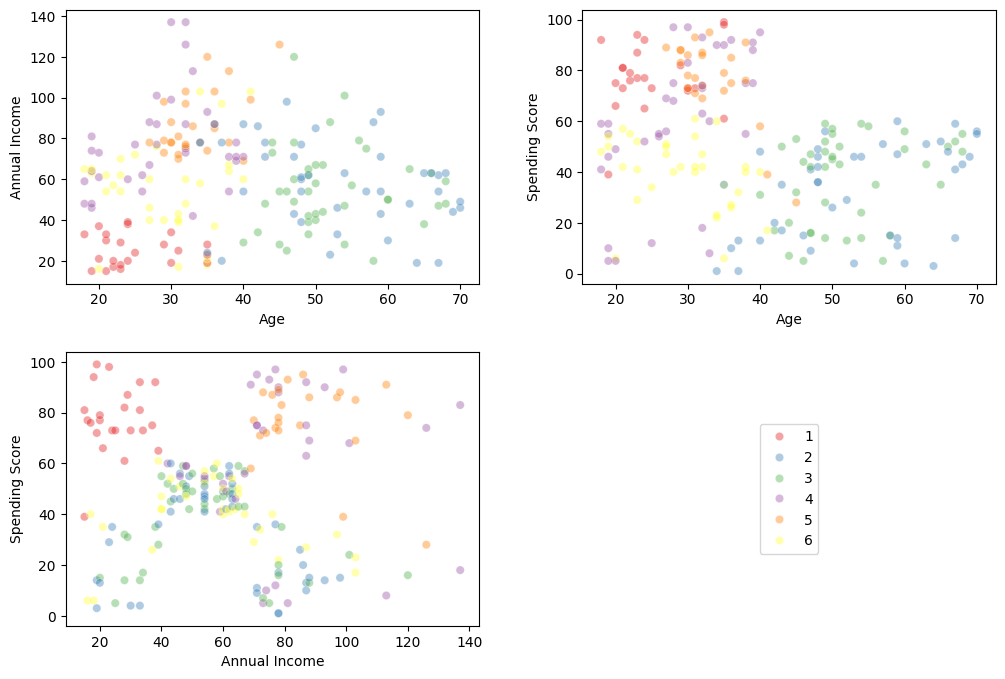

In [44]:
fig, axes = plt.subplots(figsize=(12, 8), ncols=2, nrows=2)

sns.scatterplot(data=customers, x='Age', y='Annual Income',
                hue='Cluster', ax=axes[0][0], alpha=0.4, palette='Set1')
sns.scatterplot(data=customers, x='Age', y='Spending Score',
                hue='Cluster', ax=axes[0][1], alpha=0.4, palette='Set1')
sns.scatterplot(data=customers, x='Annual Income', y='Spending Score',
                hue='Cluster', ax=axes[1][0], alpha=0.4, palette='Set1')

axes[1, 1].axis('off')

handles, labels = axes[0, 0].get_legend_handles_labels()
for ax in axes.flat:
    if ax.get_legend() is not None:
        ax.get_legend().remove()
axes[1, 1].legend(handles, labels, loc='center', )

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [49]:
plot_df = pd.crosstab(index=customers['Cluster'], columns=customers['Gender'],
            values=customers['Gender'], aggfunc='size', normalize='index')

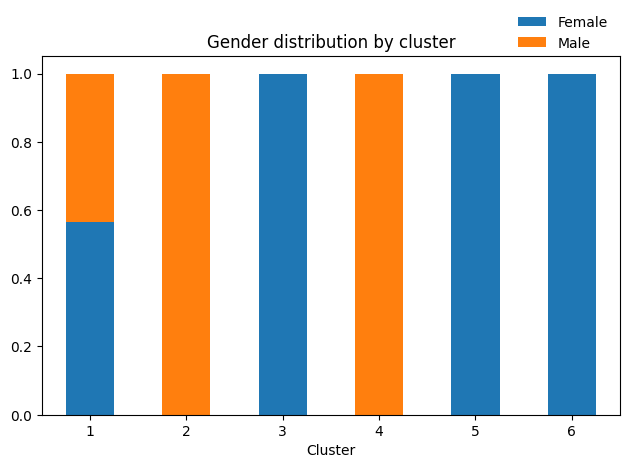

In [69]:
ax = plot_df.plot(kind='bar', stacked=True)

ax.legend(bbox_to_anchor=(1, 1.15), loc='upper right', frameon=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Gender distribution by cluster')

plt.tight_layout()
plt.show()